In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager

import mahotas as mh
import cv2
import skimage.io as io
from scipy.stats import skew,kurtosis
%matplotlib inline


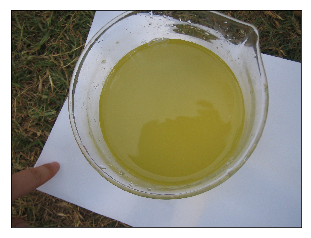

In [35]:
img = mh.imread("images/1_1.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);
h,w,c=img.shape

In [36]:
img

array([[[ 91,  82,  51],
        [ 93,  82,  52],
        [ 95,  81,  52],
        ..., 
        [ 70,  49,  30],
        [ 68,  47,  28],
        [ 67,  46,  25]],

       [[ 91,  82,  51],
        [ 93,  82,  52],
        [ 96,  82,  53],
        ..., 
        [ 70,  49,  30],
        [ 68,  47,  28],
        [ 67,  46,  27]],

       [[ 88,  77,  47],
        [ 91,  80,  50],
        [ 94,  80,  51],
        ..., 
        [ 70,  49,  30],
        [ 69,  48,  29],
        [ 68,  47,  28]],

       ..., 
       [[ 63,  40,  34],
        [ 65,  42,  36],
        [ 64,  44,  37],
        ..., 
        [134, 148, 174],
        [133, 147, 173],
        [133, 147, 173]],

       [[ 62,  42,  35],
        [ 63,  43,  36],
        [ 63,  43,  36],
        ..., 
        [134, 148, 174],
        [134, 148, 174],
        [134, 148, 174]],

       [[ 62,  42,  35],
        [ 62,  42,  35],
        [ 62,  42,  35],
        ..., 
        [134, 148, 174],
        [133, 147, 173],
        [133, 147,

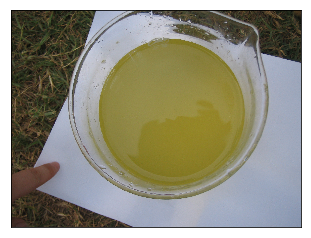

In [6]:
img0 =cv2.imread("images/1_1.jpg")
img=cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);
h,w,c=img.shape

In [9]:
img_p=img[h//2-50:h//2+50,w//2-50:w//2+50,:]

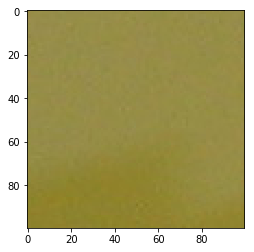

In [10]:
plt.imshow(img_p)

In [42]:
b,g,r = cv2.split(img)  
b

array([[ 91,  93,  95, ...,  70,  68,  67],
       [ 91,  93,  96, ...,  70,  68,  67],
       [ 88,  91,  94, ...,  70,  69,  68],
       ..., 
       [ 63,  65,  64, ..., 134, 133, 133],
       [ 62,  63,  63, ..., 134, 134, 134],
       [ 62,  62,  62, ..., 134, 133, 133]], dtype=uint8)

In [61]:
np.mean(b),np.std(b),

(128.48258731526482,
 44.926784082255487,
 array([-0.83548711, -0.82964335, -0.817401  , ..., -0.2981369 ,
        -0.30777841, -0.32154258]))

In [2]:
from scipy.stats import kurtosis


In [4]:
float_formatter = lambda x: "%.6f" % x
def colorDeg(img,prec=6):
    from scipy.stats import skew
    np.set_printoptions(precision=prec)
    h,w,c=img.shape
    img_p=img[h//2-50:h//2+50,w//2-50:w//2+50,:]
    m,n,c=img_p.shape
    b,g,r = cv2.split(img_p)  
    bb=b.reshape(m*n)
    gg=g.reshape(m*n)
    rr=r.reshape(m*n)
    result=np.array([np.mean(b),np.mean(g),np.mean(r),
                     np.std(b),np.std(g),np.std(r),
                     skew(bb),skew(gg),skew(rr),
                     kurtosis(bb),kurtosis(gg),kurtosis(rr)],)/255
    return result

In [7]:
res=colorDeg(img,prec=4)
res

array([  5.8276e-01,   5.4368e-01,   2.5243e-01,   1.4247e-02,
         1.6190e-02,   4.1173e-02,  -2.7341e-03,  -3.8287e-03,
        -3.9878e-03,   1.5566e-04,  -4.1336e-04,  -1.4242e-03])

In [85]:
d1/255,d2/255,d3/255

(0.5827596078431373, 0.014247359608877809, -0.0027340714074944174)

In [11]:
img_p.shape

(100, 100, 3)

In [12]:
m,n,c=img_p.shape
b,g,r = cv2.split(img_p)  
bb=b.reshape(m*n)

In [99]:
h="name,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4"


In [162]:
res

array([ 0.583835,  0.580975,  0.350639,  0.012895,  0.011917,  0.017692,
       -0.000795, -0.001681, -0.00297 ])

In [163]:
testarry=np.array([])
testarry=np.append(testarry,res)
testarry

array([ 0.583835,  0.580975,  0.350639,  0.012895,  0.011917,  0.017692,
       -0.000795, -0.001681, -0.00297 ])

In [13]:
import glob,os,sys
from glob import glob

In [14]:
# define picture where located
imgdata="images"

# names of defaulted pictures 
imgdir=os.path.join( imgdata,"*.jpg")

img_list = glob(imgdir)

In [15]:
img_list[0][7]

'1'

In [16]:
testarry=np.array([])
for img_file in img_list:
    tmp=np.array([])
    img0 =cv2.imread(img_file)
    img=cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
    res=colorDeg(img,prec=6)
    tmp=np.append(img_file,tmp)
    tmp=np.append(img_file[7],tmp)
    res=np.append(tmp,res)
    testarry=np.append(testarry,res)

In [17]:
testarry[:11]

array(['1', 'images/1_1.jpg', '0.5827596078431373', '0.543684705882353',
       '0.2524262745098039', '0.014247359608877809',
       '0.016189530955901334', '0.041172728179138036',
       '-0.0027340714074944174', '-0.003828733439405695',
       '-0.003987841992474105'],
      dtype='<U32')

In [197]:
# create the column name for 3 levels
m=len(testarry)//11
final=testarry.reshape(m,11)

In [19]:
# create the column name for 4 levels
m=len(testarry)//14
final=testarry.reshape(m,14)

In [20]:
float_formatter = lambda x: "%.6f" % x

for i in range(m):
    for j in range(2,14):
        #print(final[i][j])
        final[i][j]= float_formatter(final[i][j].astype(float))

In [21]:
h="type,name,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4"
#np.savetxt("test.csv",final,fmt="%.6f",delimiter=",",header=h)
fmt="%s"
np.savetxt("test4.csv",final,fmt=fmt,delimiter=",",header=h)

In [43]:
def get_contrasted(image, type="dark", level=3):
    maxIntensity = 255.0 # depends on dtype of image data
    phi = 1
    theta = 1

    if type == "light":
        newImage0 = (maxIntensity/phi)*(image/(maxIntensity/theta))**0.5
        newImage0 = np.array(newImage0,dtype=int)#,dtype=uint8)
        return newImage0
    elif type == "dark":
        newImage1 = (maxIntensity/phi)*(image/(maxIntensity/theta))**level
        newImage1 = np.array(newImage1,dtype=int)

        return newImage1

In [30]:

def sharp(image, level=3):
    f = cv2.GaussianBlur(image, (level,level), level)
    f = cv2.addWeighted(image, 1.5, f, -0.5, 0)
    return f

In [44]:

#original_image = imread('imagen.jpg')
# 1 Convert to gray & Normalize
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = sharp(get_contrasted(gray_img))
#gray_img = normalize(gray_img, None, 0, 255, NORM_MINMAX, CV_8UC1)
plt.imshow("Gray", gray_img)

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/filter.cpp:3671: error: (-213) Unsupported combination of source format (=4), and buffer format (=5) in function getLinearRowFilter


In [42]:
gray_img

array([[  7.672213,   8.84909 ,   3.652301, ...,   7.572788,   6.375121,
         10.488702],
       [  4.607446,   4.873493,   3.423548, ...,   7.125577,   5.320334,
          5.831785],
       [  4.010794,   3.213196,   3.182604, ...,   6.126287,   5.528818,
          5.304815],
       ..., 
       [ 53.162894,  50.286567,  49.279898, ...,  65.578139,  67.131399,
         66.997323],
       [ 51.833099,  49.11575 ,  46.929381, ...,  64.112827,  64.043132,
         63.977956],
       [ 58.364313,  53.947094,  50.17524 , ...,  62.535185,  62.6024  ,
         62.6024  ]])

In [ ]:



original_image = imread('imagen.jpg')
# 1 Convert to gray & Normalize
gray_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
gray_img = sharp(get_contrasted(gray_img))
gray_img = normalize(gray_img, None, 0, 255, NORM_MINMAX, CV_8UC1)
imshow("Gray", gray_img)

# 2 Find Threshold
gray_blur = cv2.GaussianBlur(gray_img, (7, 7), 0)
adapt_thresh_im = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)
max_thresh, thresh_im = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
thresh = cv2.bitwise_or(adapt_thresh_im, thresh_im)

# 3 Dilate
gray = cv2.Canny(thresh, 88, 400, apertureSize=3)
gray = cv2.dilate(gray, None, iterations=8)
gray = cv2.erode(gray, None, iterations=8)
imshow("Trheshold", gray)

# 4 Flood
contours, _ = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_info = []
for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]
holes = np.zeros(gray_img.shape, np.uint8)
drawContours(holes, max_contour, 0, 255, -1)
imshow("Holes", holes)

mask = cv2.GaussianBlur(holes, (15, 15), 0)
mask = np.dstack([mask] * 3)  # Create 3-channel alpha mask

mask = mask.astype('float32') / 255.0  # Use float matrices,
img = original_image.astype('float32') / 255.0  # for easy blending
masked = (mask * img) + ((1 - mask) * (0,0,1))  # Blend
masked = (masked * 255).astype('uint8')

imshow("Maked", masked)
waitKey()
0 Original



In [2]:


#cv2.namedWindow('image', cv2.WINDOW_NORMAL)

#Load the Image
img = cv2.imread('images/1_1.jpg')
height, width = imgo.shape[:2]

#Create a mask holder
mask = np.zeros(img.shape[:2],np.uint8)

#Grab Cut the object
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

#Hard Coding the Rect The object must lie within this rect.
rect = (10,10,width-30,height-30)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = img*mask[:,:,np.newaxis]

#Get the background
background = img - img1

#Change all pixels in the background that are not black to white
background[np.where((background > [0,0,0]).all(axis = 2))] = [255,255,255]

#Add the background and the image
final = background + img1


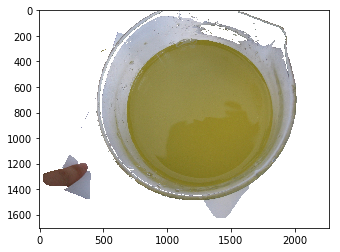

In [5]:
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))

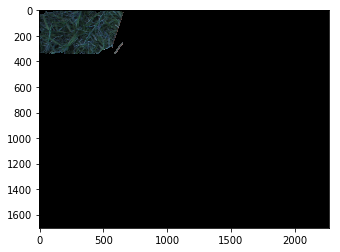

In [9]:
img = cv2.imread('images/1_1.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (1,1,665,344)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)

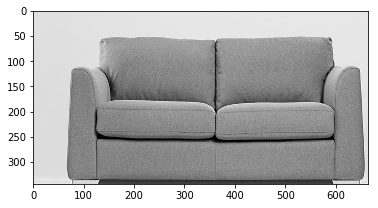

In [15]:
import cv2
file_name = 'test.png'

src = cv2.imread(file_name, 1)
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(src)
#rgba = [b,g,r, alpha]
#dst = cv2.merge(rgba,4)
dst = cv2.merge([b,g,r],3)
#cv2.imwrite("test.png", dst)

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

In [18]:
alpha

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

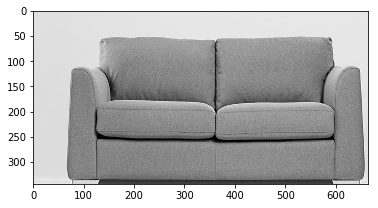

In [17]:
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

In [ ]:


#cv2.namedWindow('image', cv2.WINDOW_NORMAL)

#Load the Image
imgo = cv2.imread('images/1_1.jpg')
height, width = imgo.shape[:2]

#Create a mask holder
mask = np.zeros(imgo.shape[:2],np.uint8)

#Grab Cut the object
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

#Hard Coding the Rect The object must lie within this rect.
rect = (10,10,width-30,height-30)
cv2.grabCut(imgo,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = imgo*mask[:,:,np.newaxis]

#Get the background
background = imgo - img1

#Change all pixels in the background that are not black to white
background[np.where((background > [0,0,0]).all(axis = 2))] = [255,255,255]

#Add the background and the image
final = background + img1

#To be done - Smoothening the edges

cv2.imshow('image', final )

k = cv2.waitKey(0)

if k==27:
    cv2.destroyAllWindows()

In [21]:
image = cv2.imread('milstein-backing.jpg')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # grayscale
_,thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY_INV) # threshold
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilated = cv2.dilate(thresh,kernel,iterations = 13) # dilate
_,contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) # get contours

# for each contour found, draw a rectangle around it on original image
for contour in contours:
  # get rectangle bounding contour
  [x,y,w,h] = cv2.boundingRect(contour)
# discard areas that are too large
#if h>300 and w>300:
# continue

# discard areas that are too small
#if h<40 or w<40:
#continue

# draw rectangle around contour on original image
cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)

array([[[ 31,  31,  31],
        [255,   0, 255],
        [255,   0, 255],
        ..., 
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ..., 
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ..., 
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       ..., 
       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ..., 
        [ 34,  34,  34],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ..., 
        [255,   0, 255],
        [255,   0, 255],
        [255,   0, 255]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ..., 
        [255,   0, 255],
        [255,   0, 255],
        [255,   0,